In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')   
import matplotlib as mpl
mpl.rcParams['font.family']='serif'
import warnings; warnings.simplefilter('ignore')  #忽略警告

In [2]:
import numpy as np
import pandas as pd
import tushare as ts

## 一、Momentum average 允许卖空 

### 1, in sample

In [18]:
data=ts.get_k_data('600728',start='2018-05-01',end='2019-05-10')[['date','close']]

In [19]:
data.rename(columns={'close':'price'},inplace=True)

In [20]:
data.set_index('date',inplace = True)

In [21]:
data['returns'] = np.log(data['price'] / data['price'].shift(1)) 

In [22]:
data['position_5'] = np.sign(data['returns'].rolling(5).mean())

In [23]:
data['strategy_5'] = data['position_5'].shift(1) * data['returns']

In [24]:
data.head(2)

,price,returns,position_5,strategy_5
date,,,,
2018-05-02,8.44,NaN,NaN,NaN
2018-05-03,8.58,0.016452,NaN,NaN


In [25]:
data['returns_dis'] = data['price'] / data['price'].shift(1)-1
#data['returns_dis'] = data['price'].pct_change()
data['returns_dis_cum'] = (data['returns_dis']+1).cumprod()
data.head()

,price,returns,position_5,strategy_5,returns_dis,returns_dis_cum
date,,,,,,
2018-05-02,8.44,NaN,NaN,NaN,NaN,NaN
2018-05-03,8.58,0.016452,NaN,NaN,0.016588,1.016588
2018-05-04,8.45,-0.015267,NaN,NaN,-0.015152,1.001185
2018-05-07,8.61,0.018758,NaN,NaN,0.018935,1.020142
2018-05-08,8.70,0.010399,NaN,NaN,0.010453,1.030806


In [26]:
price_plot = ['returns_dis_cum']    #这是用来绘制图形的一个list
type(price_plot)

list

In [27]:
for days in [10,20,30,40,50,60]:
#     data['position_%d' % days] = np.sign(data['returns'].rolling(days).mean())
    price_plot.append('sty_cumr_%dd' % days)
    data['position_%dd' % days] = np.where(data['returns'].rolling(days).mean()>0,1,-1)
    data['strategy_%dd' % days] = data['position_%dd' % days].shift(1) * data['returns']
    data['sty_cumr_%dd' % days] = (data['strategy_%dd' % days]+1).cumprod()

In [28]:
data.index=pd.to_datetime(data.index)

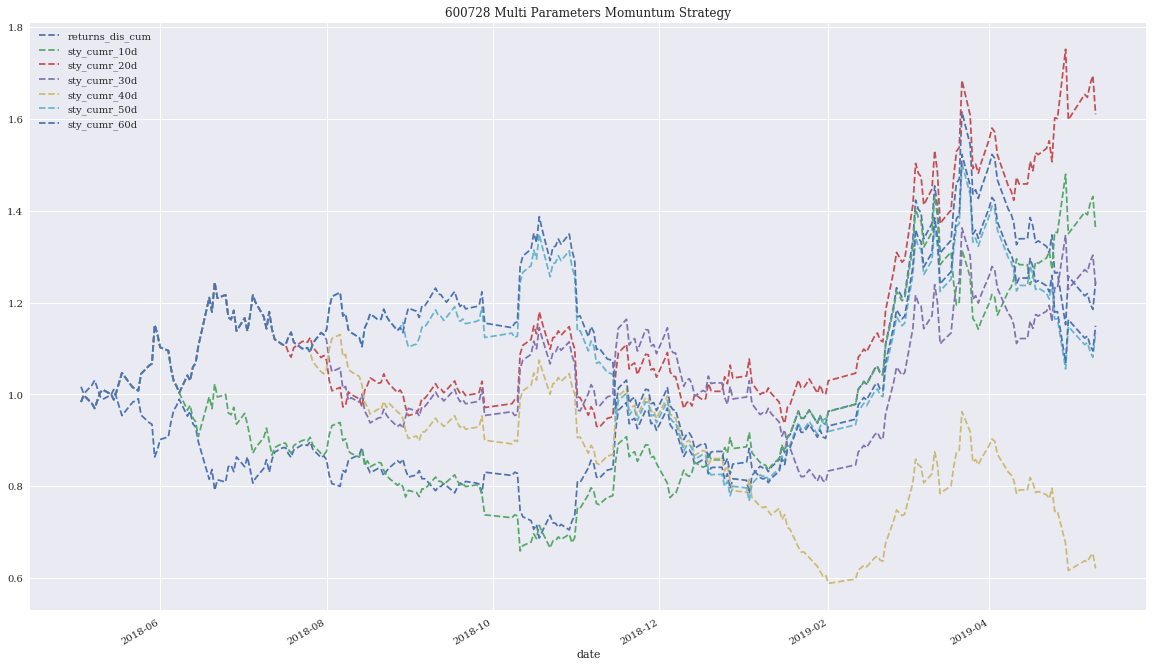

In [29]:
data[price_plot].dropna().plot(
    title='600728 Multi Parameters Momuntum Strategy',
    figsize=(20, 12), style=['--', '--', '--', '--','--','--','--'])

In [30]:
profit=data[['returns','strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].mean()*252
profit

returns         0.221988
strategy_10d    0.426072
strategy_20d    0.596715
strategy_30d    0.331315
strategy_40d   -0.366158
strategy_50d    0.243555
strategy_60d    0.256672
dtype: float64

In [31]:
risk=data[['returns', 'strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].std() * 252
risk

returns         7.664705
strategy_10d    7.656038
strategy_20d    7.644585
strategy_30d    7.660742
strategy_40d    7.659149
strategy_50d    7.664048
strategy_60d    7.663618
dtype: float64

In [32]:
c = profit/risk
c

returns         0.028962
strategy_10d    0.055652
strategy_20d    0.078057
strategy_30d    0.043248
strategy_40d   -0.047807
strategy_50d    0.031779
strategy_60d    0.033492
dtype: float64

###  2,  out  sample

In [33]:
data=ts.get_k_data('600728',start='2017-01-01',end='2017-12-10')[['date','close']]

In [34]:
data.rename(columns={'close':'price'},inplace=True)

In [35]:
data.set_index('date',inplace = True)

In [36]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))   

In [37]:
data['position_5'] = np.sign(data['returns'].rolling(5).mean())

In [38]:
data['strategy_5'] = data['position_5'].shift(1) * data['returns']

In [39]:
data['returns_dis'] = data['price'] / data['price'].shift(1)-1
#data['returns_dis'] = data['price'].pct_change()
data['returns_dis_cum'] = (data['returns_dis']+1).cumprod()
data.head()

,price,returns,position_5,strategy_5,returns_dis,returns_dis_cum
date,,,,,,
2017-01-03,8.523,NaN,NaN,NaN,NaN,NaN
2017-01-04,8.632,0.012708,NaN,NaN,0.012789,1.012789
2017-01-05,8.592,-0.004645,NaN,NaN,-0.004634,1.008096
2017-01-06,8.523,-0.008063,NaN,NaN,-0.008031,1.000000
2017-01-09,8.543,0.002344,NaN,NaN,0.002347,1.002347


In [40]:
for days in [10,20,30,40,50,60]:
#     data['position_%d' % days] = np.sign(data['returns'].rolling(days).mean())
    price_plot.append('sty_cumr_%dd' % days)
    data['position_%dd' % days] = np.where(data['returns'].rolling(days).mean()>0,1,-1)
    data['strategy_%dd' % days] = data['position_%dd' % days].shift(1) * data['returns']
    data['sty_cumr_%dd' % days] = (data['strategy_%dd' % days]+1).cumprod()

In [41]:
data.index=pd.to_datetime(data.index)

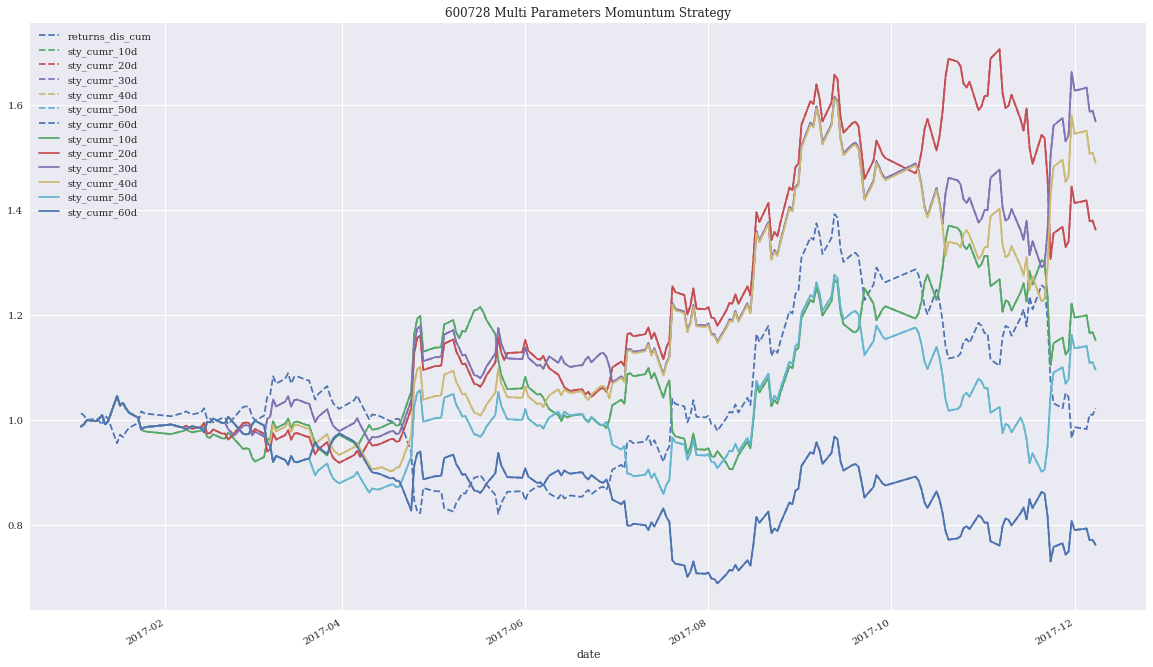

In [42]:
data[price_plot].dropna().plot(
    title='600728 Multi Parameters Momuntum Strategy',
    figsize=(20, 12), style=['--', '--', '--', '--','--','--','--'])

In [43]:
profit=data[['returns','strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].mean()*252
profit

returns         0.024242
strategy_10d    0.227740
strategy_20d    0.412408
strategy_30d    0.567257
strategy_40d    0.510222
strategy_50d    0.171180
strategy_60d   -0.228655
dtype: float64

In [44]:
risk=data[['returns', 'strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].std() * 252
risk

returns         6.015688
strategy_10d    6.011406
strategy_20d    6.001522
strategy_30d    5.988814
strategy_40d    5.993965
strategy_50d    6.013291
strategy_60d    6.011371
dtype: float64

In [45]:
c = profit/risk
c

returns         0.004030
strategy_10d    0.037885
strategy_20d    0.068717
strategy_30d    0.094719
strategy_40d    0.085123
strategy_50d    0.028467
strategy_60d   -0.038037
dtype: float64

## Momentum average不允许卖空 

### 1, in sample

In [46]:
data=ts.get_k_data('600728',start='2018-05-01',end='2019-05-10')[['date','close']]

In [47]:
data.rename(columns={'close':'price'},inplace=True)

In [48]:
data.set_index('date',inplace = True)

In [49]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))    

In [50]:
data['position_5'] = np.sign(data['returns'].rolling(5).mean())

In [51]:
data['strategy_5'] = data['position_5'].shift(1) * data['returns']

In [52]:
data.head(2)

,price,returns,position_5,strategy_5
date,,,,
2018-05-02,8.44,NaN,NaN,NaN
2018-05-03,8.58,0.016452,NaN,NaN


In [53]:
data['returns_dis'] = data['price'] / data['price'].shift(1)-1
#data['returns_dis'] = data['price'].pct_change()
data['returns_dis_cum'] = (data['returns_dis']+1).cumprod()
data.head()

,price,returns,position_5,strategy_5,returns_dis,returns_dis_cum
date,,,,,,
2018-05-02,8.44,NaN,NaN,NaN,NaN,NaN
2018-05-03,8.58,0.016452,NaN,NaN,0.016588,1.016588
2018-05-04,8.45,-0.015267,NaN,NaN,-0.015152,1.001185
2018-05-07,8.61,0.018758,NaN,NaN,0.018935,1.020142
2018-05-08,8.70,0.010399,NaN,NaN,0.010453,1.030806


In [54]:
price_plot = ['returns_dis_cum']    #这是用来绘制图形的一个list
type(price_plot)

list

In [55]:
for days in [10,20,30,40,50,60]:
#     data['position_%d' % days] = np.sign(data['returns'].rolling(days).mean())
    price_plot.append('sty_cumr_%dd' % days)
    data['position_%dd' % days] = np.where(data['returns'].rolling(days).mean()>0,1,0)
    data['strategy_%dd' % days] = data['position_%dd' % days].shift(1) * data['returns']
    data['sty_cumr_%dd' % days] = (data['strategy_%dd' % days]+1).cumprod()

In [56]:
data.index=pd.to_datetime(data.index)

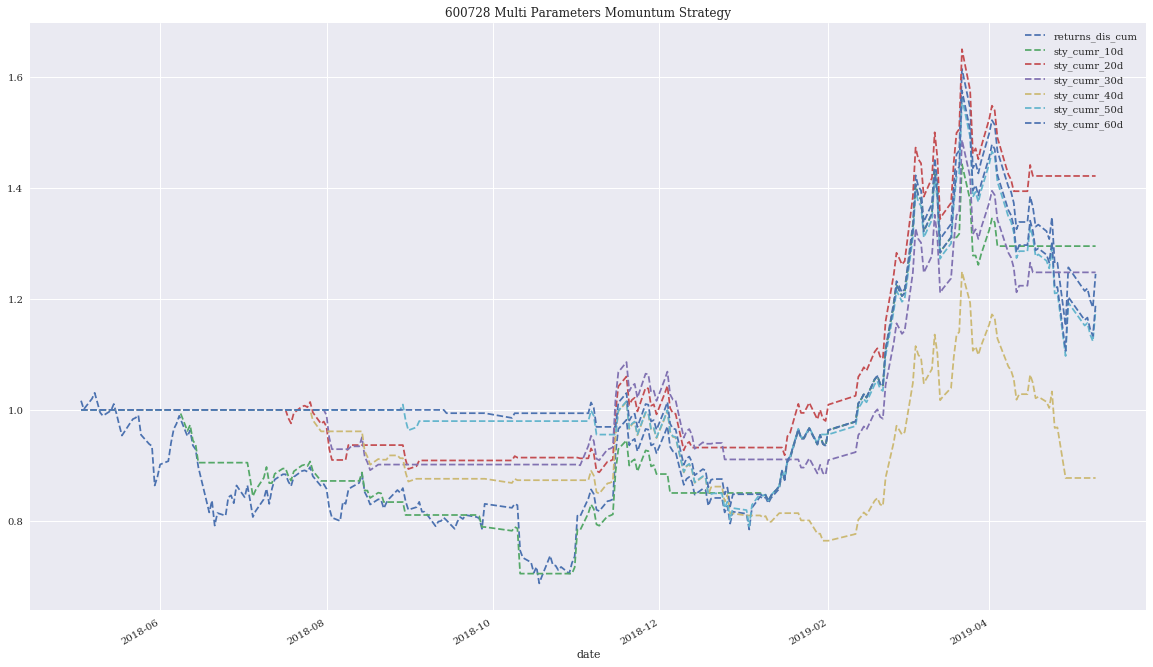

In [57]:
data[price_plot].dropna().plot(
    title='600728 Multi Parameters Momuntum Strategy',
    figsize=(20, 12), style=['--', '--', '--', '--','--','--','--'])

In [58]:
data[['returns','strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].mean()*252

returns         0.221988
strategy_10d    0.324030
strategy_20d    0.409351
strategy_30d    0.276651
strategy_40d   -0.072085
strategy_50d    0.232771
strategy_60d    0.239330
dtype: float64

In [59]:
data[['returns', 'strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].std() * 252

returns         7.664705
strategy_10d    5.626212
strategy_20d    5.208082
strategy_30d    5.175680
strategy_40d    5.543586
strategy_50d    5.770205
strategy_60d    5.680029
dtype: float64

In [60]:
c = data[['returns', 'strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].mean()/data[['returns', 'strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].std()
c

returns         0.028962
strategy_10d    0.057593
strategy_20d    0.078599
strategy_30d    0.053452
strategy_40d   -0.013003
strategy_50d    0.040340
strategy_60d    0.042135
dtype: float64

### 2,  out  sample 

In [61]:
data=ts.get_k_data('600728',start='2017-01-01',end='2017-12-10')[['date','close']]

In [62]:
data.rename(columns={'close':'price'},inplace=True)

In [63]:
data.set_index('date',inplace = True)

In [64]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))   

In [65]:
data['position_5'] = np.sign(data['returns'].rolling(5).mean())

In [66]:
data['strategy_5'] = data['position_5'].shift(1) * data['returns']

In [67]:
data['returns_dis'] = data['price'] / data['price'].shift(1)-1
#data['returns_dis'] = data['price'].pct_change()
data['returns_dis_cum'] = (data['returns_dis']+1).cumprod()
data.head()

,price,returns,position_5,strategy_5,returns_dis,returns_dis_cum
date,,,,,,
2017-01-03,8.523,NaN,NaN,NaN,NaN,NaN
2017-01-04,8.632,0.012708,NaN,NaN,0.012789,1.012789
2017-01-05,8.592,-0.004645,NaN,NaN,-0.004634,1.008096
2017-01-06,8.523,-0.008063,NaN,NaN,-0.008031,1.000000
2017-01-09,8.543,0.002344,NaN,NaN,0.002347,1.002347


In [68]:
for days in [10,20,30,40,50,60]:
#     data['position_%d' % days] = np.sign(data['returns'].rolling(days).mean())
    price_plot.append('sty_cumr_%dd' % days)
    data['position_%dd' % days] = np.where(data['returns'].rolling(days).mean()>0,1,0)
    data['strategy_%dd' % days] = data['position_%dd' % days].shift(1) * data['returns']
    data['sty_cumr_%dd' % days] = (data['strategy_%dd' % days]+1).cumprod()

In [69]:
data.index=pd.to_datetime(data.index)

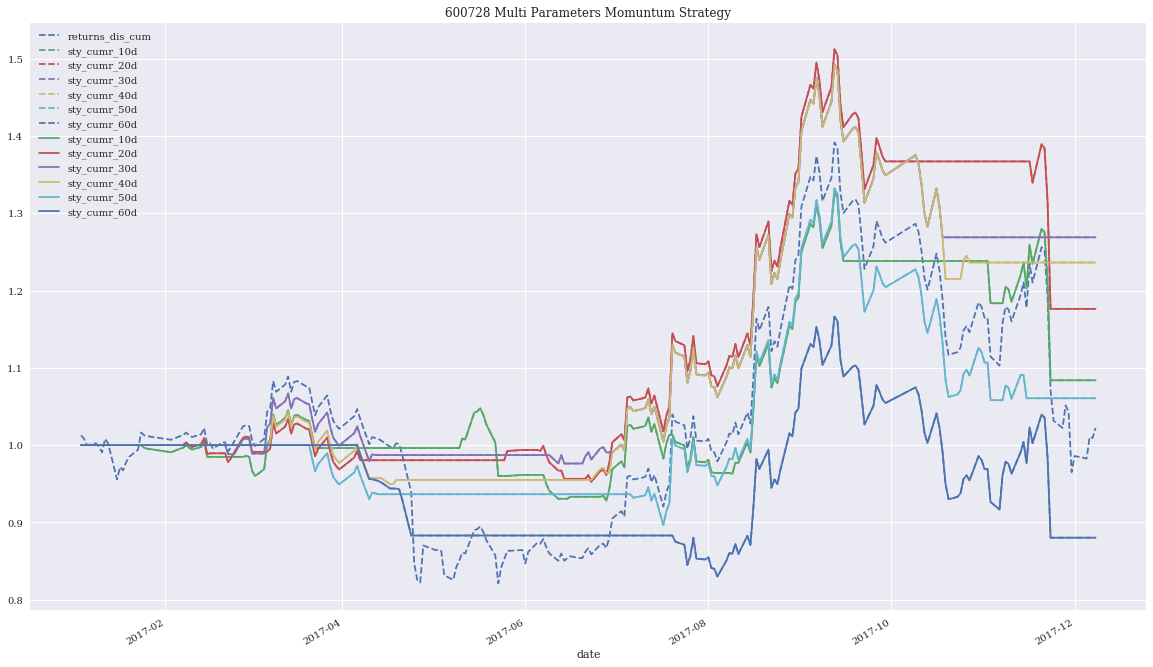

In [70]:
data[price_plot].dropna().plot(
    title='600728 Multi Parameters Momuntum Strategy',
    figsize=(20, 12), style=['--', '--', '--', '--','--','--','--'])

In [71]:
profit=data[['returns','strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].mean()*252
profit

returns         0.024242
strategy_10d    0.125991
strategy_20d    0.218325
strategy_30d    0.295750
strategy_40d    0.267232
strategy_50d    0.097711
strategy_60d   -0.102207
dtype: float64

In [72]:
risk=data[['returns', 'strategy_10d','strategy_20d','strategy_30d','strategy_40d','strategy_50d','strategy_60d']].std() * 252
risk

returns         6.015688
strategy_10d    4.307799
strategy_20d    4.426663
strategy_30d    4.076616
strategy_40d    4.092394
strategy_50d    4.084671
strategy_60d    4.413300
dtype: float64

In [73]:
c = profit/risk
c

returns         0.004030
strategy_10d    0.029247
strategy_20d    0.049320
strategy_30d    0.072548
strategy_40d    0.065300
strategy_50d    0.023921
strategy_60d   -0.023159
dtype: float64

## 二、 Moving average允许卖空

### 1，in sample 

In [82]:
data=ts.get_k_data('600728',start='2018-05-01',end='2019-05-10')[['date','close']]
data.rename(columns={'close':'price'},inplace=True)
data.set_index('date',inplace = True)

In [83]:
data['SMA_5'] = data['price'].rolling(5).mean() 
data['SMA_20'] = data['price'].rolling(20).mean()
data['SMA_1'] = data['price'].rolling(1).mean() 
data['SMA_10'] = data['price'].rolling(10).mean()
data['SMA_15'] = data['price'].rolling(15).mean() 

In [84]:
data.index=pd.to_datetime(data.index)

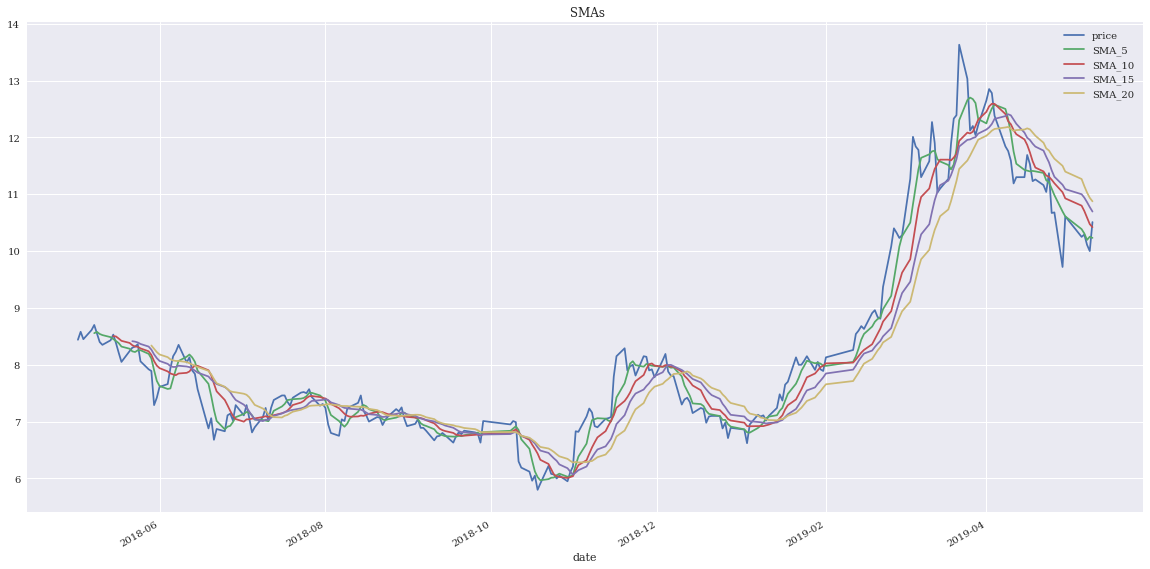

In [85]:
data[['price','SMA_5','SMA_10','SMA_15','SMA_20']].plot(title=' SMAs',figsize=(20, 10))  

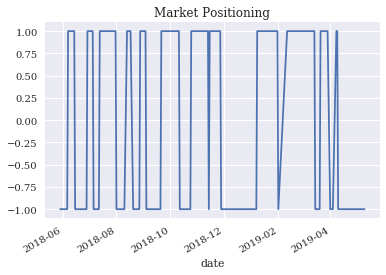

In [86]:
data['position'] = np.where(data['SMA_5'] > data['SMA_10'], 1, -1)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')

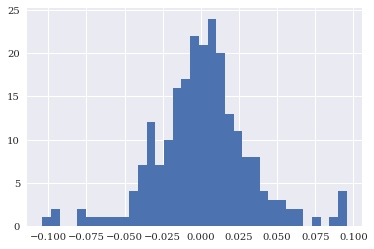

In [88]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))    
data['strategy1'] = data['position'].shift(1) * data['returns']
data['returns'].hist(bins=35)

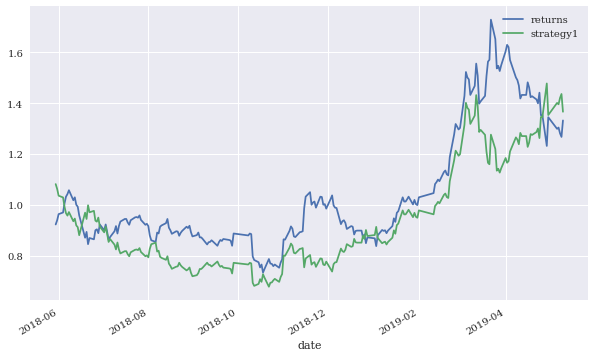

In [89]:
data[['returns','strategy1']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [90]:
data[['returns', 'strategy1']].mean() * 252     #yearly；

returns      0.314157
strategy1    0.341888
dtype: float64

In [91]:
data[['returns', 'strategy1']].std() * 252

returns      7.881661
strategy1    7.880502
dtype: float64

In [92]:
c1 = data[['returns', 'strategy1']].mean()/data[['returns', 'strategy1']].std()
c1

returns      0.039859
strategy1    0.043384
dtype: float64

### 2, out sample 

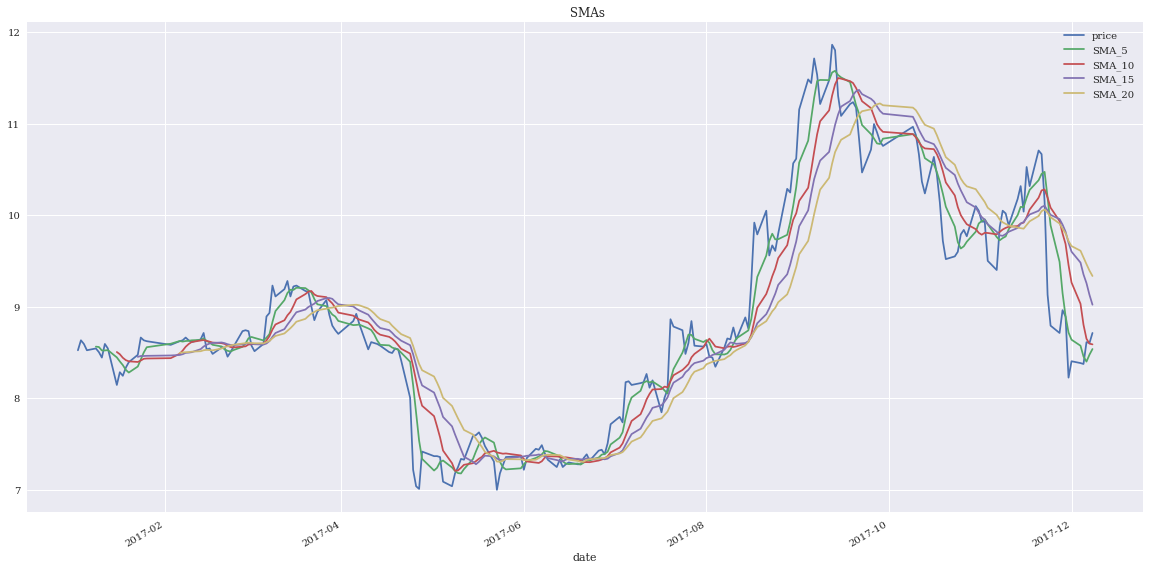

In [95]:
data=ts.get_k_data('600728',start='2017-01-01',end='2017-12-10')[['date','close']]
data.rename(columns={'close':'price'},inplace=True)
data.set_index('date',inplace = True)

data['SMA_5'] = data['price'].rolling(5).mean() 
data['SMA_20'] = data['price'].rolling(20).mean()
data['SMA_1'] = data['price'].rolling(1).mean() 
data['SMA_10'] = data['price'].rolling(10).mean()
data['SMA_15'] = data['price'].rolling(15).mean() 

data.index=pd.to_datetime(data.index)

data[['price','SMA_5','SMA_10','SMA_15','SMA_20']].plot(title=' SMAs',figsize=(20, 10))  

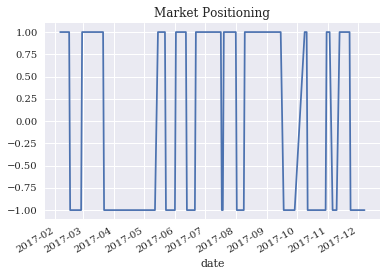

In [96]:
data['position'] = np.where(data['SMA_5'] > data['SMA_10'], 1, -1)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')

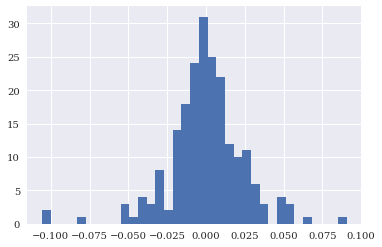

In [99]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))    
data['strategy1'] = data['position'].shift(1) * data['returns']
data['returns'].hist(bins=35)

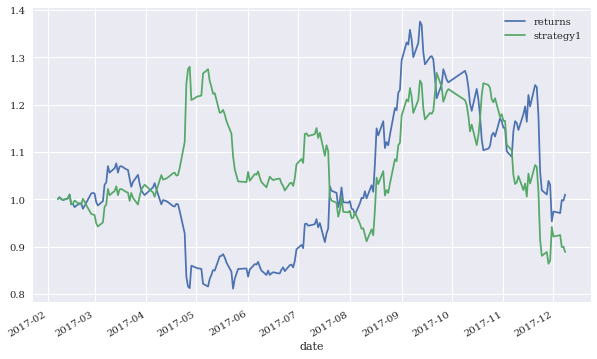

In [100]:
data[['returns','strategy1']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [101]:
data[['returns', 'strategy1']].mean() * 252     #yearly；

returns      0.012521
strategy1   -0.141797
dtype: float64

In [102]:
data[['returns', 'strategy1']].std() * 252

returns      6.185047
strategy1    6.183426
dtype: float64

In [103]:
c1 = data[['returns', 'strategy1']].mean()/data[['returns', 'strategy1']].std()
c1

returns      0.002024
strategy1   -0.022932
dtype: float64

##  Moving average不允许卖空

### 1，in sample

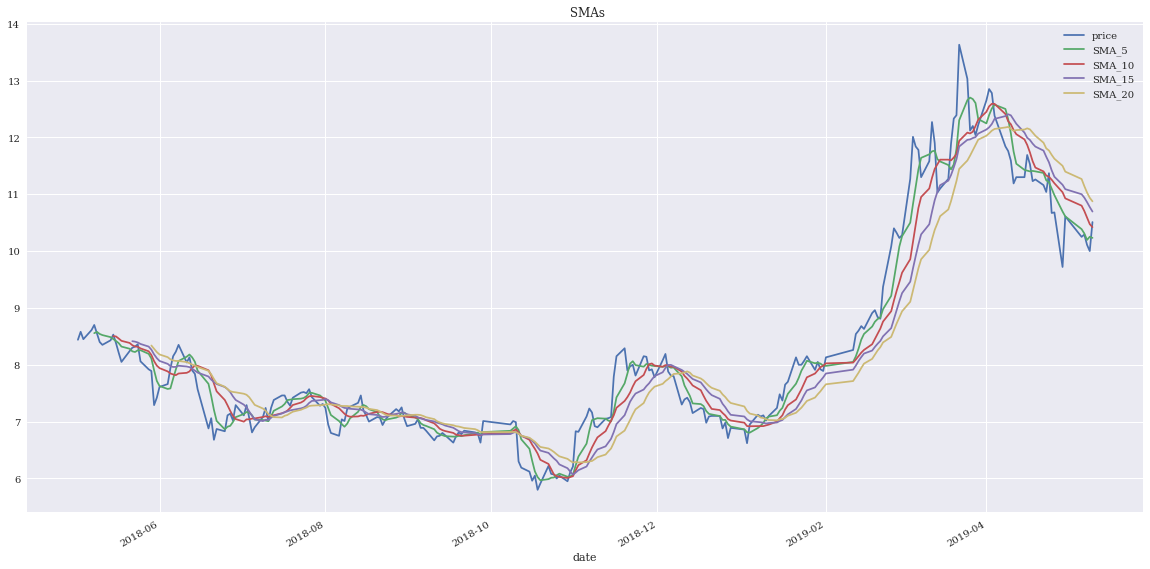

In [104]:
data=ts.get_k_data('600728',start='2018-05-01',end='2019-05-10')[['date','close']]
data.rename(columns={'close':'price'},inplace=True)
data.set_index('date',inplace = True)

data['SMA_5'] = data['price'].rolling(5).mean() 
data['SMA_20'] = data['price'].rolling(20).mean()
data['SMA_1'] = data['price'].rolling(1).mean() 
data['SMA_10'] = data['price'].rolling(10).mean()
data['SMA_15'] = data['price'].rolling(15).mean() 

data.index=pd.to_datetime(data.index)

data[['price','SMA_5','SMA_10','SMA_15','SMA_20']].plot(title=' SMAs',figsize=(20, 10))  

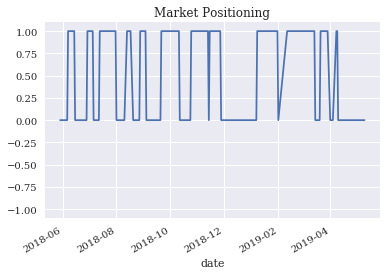

In [105]:
data['position'] = np.where(data['SMA_5'] > data['SMA_10'], 1, 0)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')

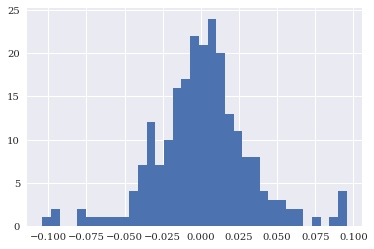

In [106]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))    
data['strategy1'] = data['position'].shift(1) * data['returns']
data['returns'].hist(bins=35)

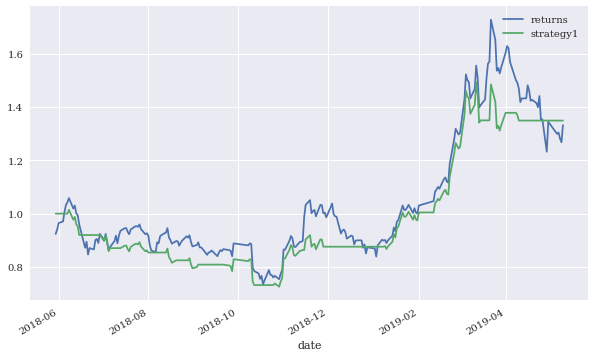

In [107]:
data[['returns','strategy1']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [108]:
data[['returns', 'strategy1']].mean() * 252     #yearly；

returns      0.314157
strategy1    0.328023
dtype: float64

In [109]:
data[['returns', 'strategy1']].std() * 252

returns      7.881661
strategy1    5.648633
dtype: float64

In [110]:
c1 = data[['returns', 'strategy1']].mean()/data[['returns', 'strategy1']].std()
c1

returns      0.039859
strategy1    0.058071
dtype: float64

### 2, out sample

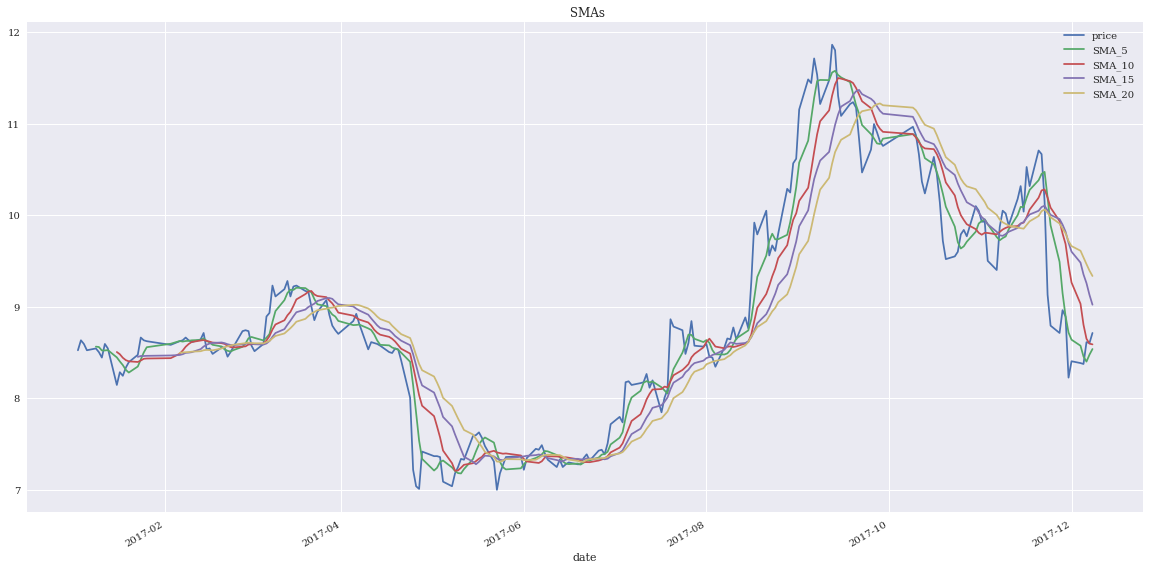

In [111]:
data=ts.get_k_data('600728',start='2017-01-01',end='2017-12-10')[['date','close']]
data.rename(columns={'close':'price'},inplace=True)
data.set_index('date',inplace = True)

data['SMA_5'] = data['price'].rolling(5).mean() 
data['SMA_20'] = data['price'].rolling(20).mean()
data['SMA_1'] = data['price'].rolling(1).mean() 
data['SMA_10'] = data['price'].rolling(10).mean()
data['SMA_15'] = data['price'].rolling(15).mean() 

data.index=pd.to_datetime(data.index)

data[['price','SMA_5','SMA_10','SMA_15','SMA_20']].plot(title=' SMAs',figsize=(20, 10))  

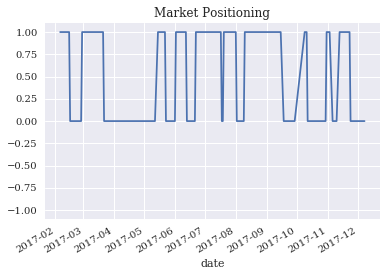

In [112]:
data['position'] = np.where(data['SMA_5'] > data['SMA_10'], 1, 0)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')

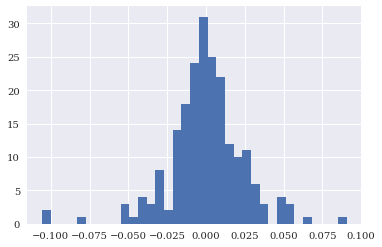

In [113]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))    
data['strategy1'] = data['position'].shift(1) * data['returns']
data['returns'].hist(bins=35)

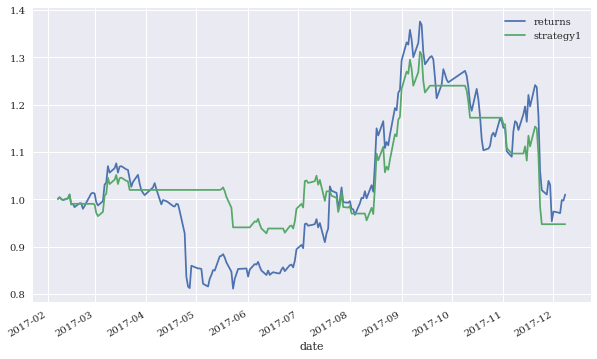

In [114]:
data[['returns','strategy1']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [115]:
data[['returns', 'strategy1']].mean() * 252     #yearly；

returns      0.012521
strategy1   -0.064638
dtype: float64

In [116]:
data[['returns', 'strategy1']].std() * 252

returns      6.185047
strategy1    4.520923
dtype: float64

In [117]:
c1 = data[['returns', 'strategy1']].mean()/data[['returns', 'strategy1']].std()
c1

returns      0.002024
strategy1   -0.014298
dtype: float64